## Exploratory Data Analysis on MovieCount, ScreenshotCount, and PriceFinal's correlation with SteamSpyOwners

**MovieCount** (Int) Number of movies/videos on game purchase page

**ScreenshotCount** (Int) Number of screenshots on game purchase page

**PriceFinal** (Float) Final price of the game

**SteamSpyOwners** (Int) Number of owners of the game

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../Datasets/games-features.csv')

MovieScreenshotPrice_df = df[['MovieCount','ScreenshotCount',
         'PriceFinal','SteamSpyOwners']]

MovieScreenshotPrice_df = df[MovieScreenshotPrice_df['SteamSpyOwners'] > 0]
MovieScreenshotPrice_df['SteamSpyOwnersLog'] = np.log(MovieScreenshotPrice_df['SteamSpyOwners'])

MovieScreenshotPrice_df['log_price'] = np.log(MovieScreenshotPrice_df['PriceFinal'])

#drop MovieCount = 0
df_drop0_mov = MovieScreenshotPrice_df[MovieScreenshotPrice_df['MovieCount'] > 0]

#drop PriceFinal = 0
df_drop0_price = MovieScreenshotPrice_df[MovieScreenshotPrice_df['PriceFinal'] > 0]

Here we create new columns **'SteamSpyOwnersLog'** and **'log_price'** to produce normally distributed graphs for our analyses.

We create two new df's called **df_drop0_mov** and **df_drop0_price** to exclude the values equal to 0 in their respective columns.

## MovieCount vs SteamSpyOwners Univariate Analysis

We want to plot the number of games correspondent to the number of movies displayed on the Steam website. 

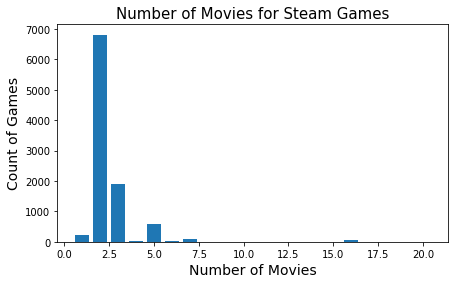

In [3]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(df_drop0_mov['MovieCount'].unique(), df_drop0_mov['MovieCount'].value_counts().values)
plt.title('Number of Movies for Steam Games', fontsize = 15)
plt.xlabel('Number of Movies',fontsize = 14)
plt.ylabel('Count of Games', fontsize = 14)
plt.show()

The plot shows that after dropping the 0 values, most of the games in the dataset have around 2 or 3 movies on their respective websites. There are a couple of outlier games that have 16 movies available, and a max value at 20 movies.

## MovieCount vs SteamSpyOwners Bivariate Analysis

We are looking for a graph of the data of how many owners are in the different games, according to how many movies it has. Here we will use the log number of **SteamSpyOwners** and then take the mean of those numbers for each **MovieCount** value.

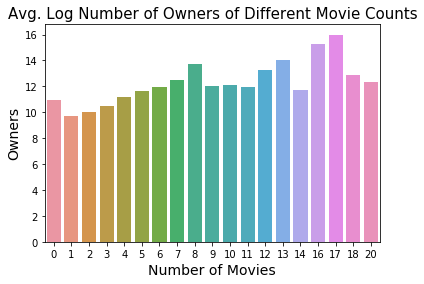

In [4]:
mov_helper1 = MovieScreenshotPrice_df.groupby('MovieCount').mean()['SteamSpyOwnersLog']
mov_helper2 = pd.DataFrame(data=mov_helper1)
mov_helper2 = mov_helper2.reset_index()
sns.barplot(x = 'MovieCount', y = 'SteamSpyOwnersLog', data = mov_helper2)

plt.xlabel("Number of Movies", fontsize = 14) 
plt.ylabel("Owners", fontsize = 14) 
plt.title("Avg. Log Number of Owners of Different Movie Counts",fontsize = 15) 
plt.show()

We compared the average **SteamSpyOwnersLog** in different **MovieCount** values. Here we can see an upward trend in the data, in that the more movies a game has could be positively correlated with its game ownership.

## ScreenshotCount vs SteamSpyOwners Univariate Analysis

We want to plot the number of games correspondent to the **ScreenshotCount** displayed on the Steam website.

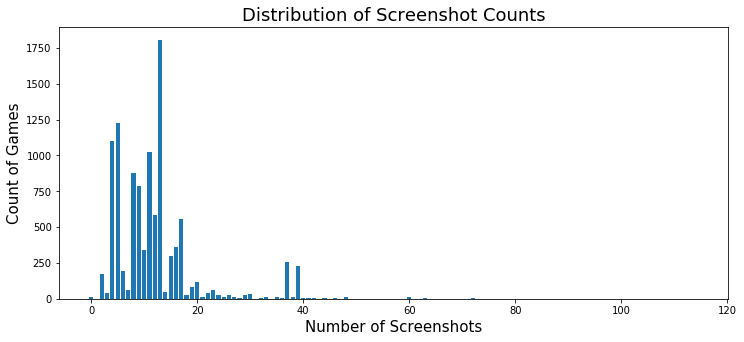

In [5]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(MovieScreenshotPrice_df['ScreenshotCount'].unique(), MovieScreenshotPrice_df['ScreenshotCount'].value_counts().values)
plt.title('Distribution of Screenshot Counts', fontsize = 18)
plt.xlabel('Number of Screenshots',fontsize = 15)
plt.ylabel('Count of Games', fontsize = 15)
plt.show()

The plot shows that most of the games in the dataset have between 5 to 20 screenshots on their Steam pages. There are a quite a number of outlier value **ScreenshotCounts** that is making our data rightly skewed.

## ScreenshotCount vs SteamSpyOwners Bivariate Analysis

We are looking for a graph of the data of how many **SteamSpyOwners** are in the different games, according to their **ScreenshotCount**. Here we will use the **SteamSpyOwnersLog** and then take the mean of those numbers for each **ScreenshotCount** value.

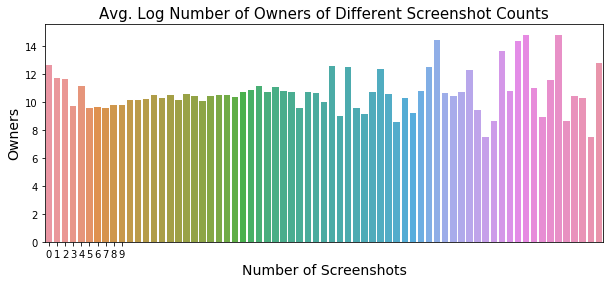

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ss_helper1 = MovieScreenshotPrice_df.groupby('ScreenshotCount').mean()['SteamSpyOwnersLog']
ss_helper2 = pd.DataFrame(data=ss_helper1)
ss_helper2 = ss_helper2.reset_index()
sns.barplot(x = 'ScreenshotCount', y = 'SteamSpyOwnersLog', data = ss_helper2)
plt.xlabel("Number of Screenshots", fontsize = 14) 
ax.set_xticks(np.arange(0,10))
plt.ylabel("Owners", fontsize = 14) 
plt.title("Avg. Log Number of Owners of Different Screenshot Counts",fontsize = 15) 
plt.show()

We compared the average **SteamSpyOwnersLog** in different **ScreenshotCount** values. Here can see an slight positive trend in the data, in that the more screenshots a game has could be potentially be correlated with its game ownership and popularity.

## PriceFinal vs SteamSpyOwners Univariate Analysis

We want to plot the number of games correspondent to the price displayed on the Steam website. We will use the **log_price** of our dataset.

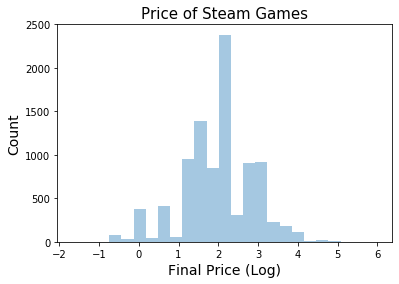

In [7]:
sns.distplot(df_drop0_price['log_price'],bins = 25, kde = False)
plt.title('Price of Steam Games', fontsize = 15)
plt.xlabel('Final Price (Log)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

## PriceFinal vs SteamSpyOwners Bivariate Analysis

We are looking for a graph of the data of how many **SteamSpyOwners** are in the different games, according to their **PriceFinal**. Here we will use a scatterplot with the **SteamSpyOwnersLog** data for owners.

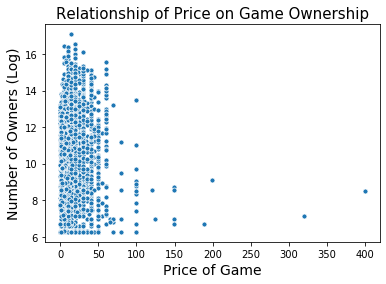

In [8]:
sns.scatterplot(x='PriceFinal', y='SteamSpyOwnersLog', data=df_drop0_price, s=25)
plt.title('Relationship of Price on Game Ownership', fontsize=15)
plt.xlabel('Price of Game', fontsize = 14)
plt.ylabel('Number of Owners (Log)', fontsize = 14)
plt.show()

From what we can see from the graph, we see that the games with the most ownership are the ones between the price range of 1 to 50 USD, and we start to see less and less game ownership as the price of the games increases. We can see this as a negatively correlated relationship, but we also have to take into account that there is also a significant amount of games in between the 1 to 50 price range that have little game ownership.